# tesla stock data task 1 DS:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
data = pd.read_csv('tesla-stock-data.csv', date_parser=True)
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,3.800,5.000,3.508,4.778,4.778,93831500
1,30-06-2010,5.158,6.084,4.660,4.766,4.766,85935500
2,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
3,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
4,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
scaler = MinMaxScaler()
data['ScaledPrice'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

sequence_length = 10  
sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data['ScaledPrice'].values[i:i+sequence_length])
    
X = np.array(sequences)
y = data['ScaledPrice'].values[sequence_length:]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [6]:
model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
37/37 [==============================] - 8s 63ms/step - loss: 0.0065 - val_loss: 0.0010
Epoch 2/20
37/37 [==============================] - 1s 23ms/step - loss: 4.2270e-04 - val_loss: 3.4877e-04
Epoch 3/20
37/37 [==============================] - 1s 23ms/step - loss: 3.3027e-04 - val_loss: 3.6763e-04
Epoch 4/20
37/37 [==============================] - 1s 23ms/step - loss: 3.4432e-04 - val_loss: 3.5535e-04
Epoch 5/20
37/37 [==============================] - 1s 23ms/step - loss: 3.3395e-04 - val_loss: 3.0783e-04
Epoch 6/20
37/37 [==============================] - 1s 23ms/step - loss: 3.9056e-04 - val_loss: 3.0544e-04
Epoch 7/20
37/37 [==============================] - 1s 24ms/step - loss: 3.5527e-04 - val_loss: 3.1403e-04
Epoch 8/20
37/37 [==============================] - 1s 25ms/step - loss: 3.0122e-04 - val_loss: 3.6749e-04
Epoch 9/20
37/37 [==============================] - 1s 26ms/step - loss: 4.1017e-04 - val_loss: 3.7878e-04
Epoch 10/20
37/37 [==========================

In [7]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


19/19 [==============================] - 0s 6ms/step


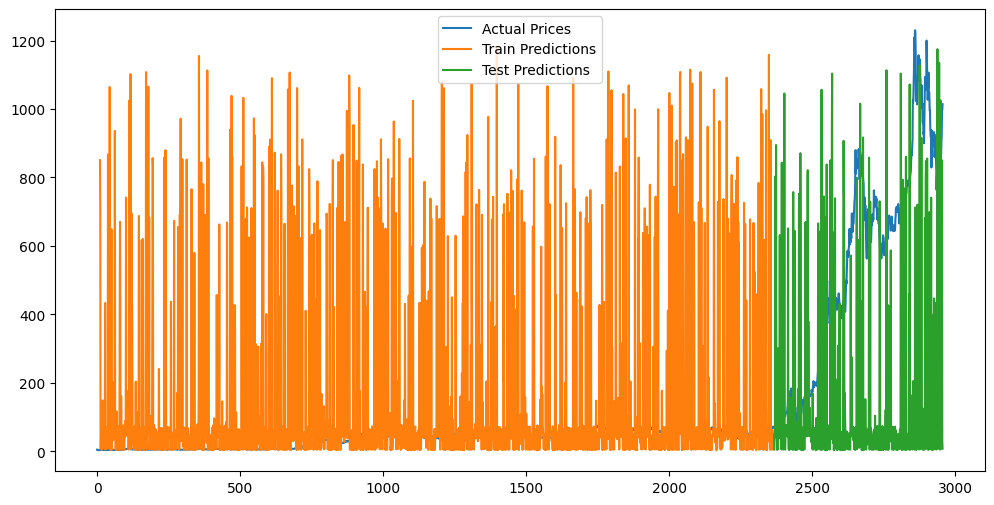

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(np.arange(sequence_length, sequence_length + len(train_predictions)), train_predictions, label='Train Predictions')
plt.plot(np.arange(sequence_length + len(train_predictions), len(data)), test_predictions, label='Test Predictions')
plt.legend()
plt.show()
